# Scikit-Learn Basics

In [1]:
import numpy as np
from numpy.random import normal, seed, shuffle
import matplotlib.pyplot as plt

In [2]:
def shuffle_dataset(x, y):
    _, cols = x.shape
    dataset = np.c_[x, y]
    shuffle(dataset)
    xout, yout = dataset[:,:cols], dataset[:,cols]
    return xout, yout

In [4]:
seed(42)
X1 = normal(loc=-0.8, size=(100, 2))
X2 = normal(loc=+0.8, size=(100, 2))

train_x = np.r_[X1, X2]
train_y = np.r_[np.zeros(100), np.ones(100)]
train_x, train_y = shuffle_dataset(train_x, train_y)

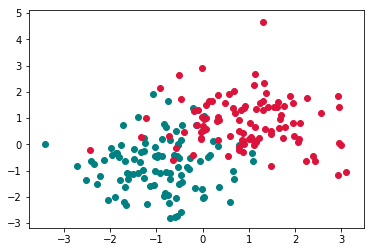

In [5]:
plt.scatter(*X1.T, color="teal")
plt.scatter(*X2.T, color="crimson")
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

** The Confusion Matrix**

|   | F | T
|---| --- | ---
| **F** |TN | FP
| **T** | FN | TP

How well you predicted:
$$
    \text{Precision} = \frac{TP}{TP + FP}
$$

How *not* bad you missed:
$$
    \text{Recall} = \frac{TP}{TP + FN}
$$

The F1: Harmonic Mean
$$
    F_1 = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}
$$

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Prediction over cross-validated data
train_cv_pred = cross_val_predict(lr, train_x, train_y, cv=3)

In [9]:
confusion_matrix(train_y, train_cv_pred, labels=[0,1])

array([[88, 12],
       [10, 90]])

In [10]:
precision_score(train_y, train_cv_pred)

0.88235294117647056

In [11]:
recall_score(train_y, train_cv_pred)

0.90000000000000002

In [12]:
# Whereas the regular mean treats all values equally,
# the harmonic mean gives much more weight to low values.
f1_score(train_y, train_cv_pred)

0.8910891089108911

In [13]:
# Arithmetic Mean
(precision_score(train_y, train_cv_pred) + recall_score(train_y, train_cv_pred)) / 2

0.89117647058823524

We did better at *not* missing 1's than we did being sure it was 1, i.e., the model decided it was better to predict more 1's that weren't, rather than leaning towards a prediction of 0.

In [14]:
train_y_scores = cross_val_predict(lr, train_x, train_y, cv=3, method="decision_function")

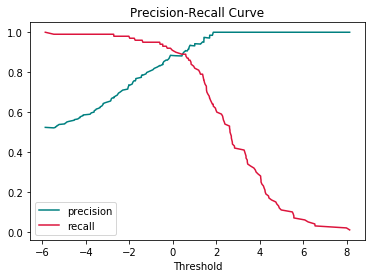

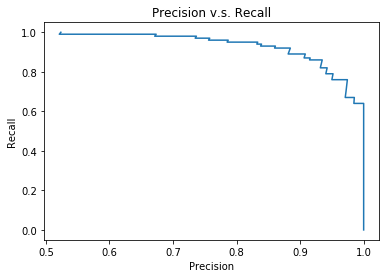

In [30]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_curve(y, scores):
    plt.title("Precision-Recall Curve")
    precision, recall, threshold = precision_recall_curve(y, scores)
    plt.plot(threshold, precision[:-1], label="precision", color="teal")
    plt.plot(threshold, recall[:-1], label="recall", color="crimson")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.show()
    

def plot_precision_vs_recall(y, scores):
    plt.title("Precision v.s. Recall")
    precision, recall, _ = precision_recall_curve(y, scores)
    plt.plot(precision, recall)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.show()
    
plot_precision_recall_curve(train_y, train_y_scores[:,1])
plot_precision_vs_recall(train_y, train_y_scores[:,1])

### The ROC curve
*Receiver Operating Characteristic*

Plots the True positive rate agains the false negative rate. We compute the ROC curve by shifting the thresholds.

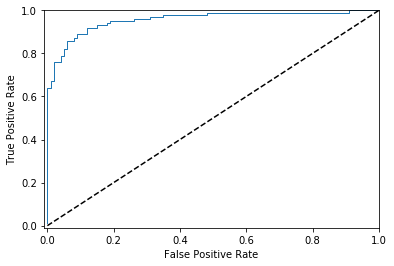

In [50]:
from sklearn.metrics import roc_curve
# false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(train_y, train_y_scores[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=1, label=label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([-0.01, 1, -0.01, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

### Model on the test dataset

In [173]:
nsamp = 50
test_x = np.r_[normal(loc=-0.8, size=(nsamp, 2)),
             normal(loc=+0.8, size=(nsamp, 2)),]
test_y = np.r_[np.zeros(nsamp), np.ones(nsamp)]

test_x, test_y = shuffle_dataset(test_x, test_y)

In [183]:
# Total precision on the test dataset
test_predict = lr.predict(test_x)
precision_score(test_y, test_predict)

0.8035714285714286

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y, train_y_scores[:,1])

0.95829999999999993

## Trying a different classifier 

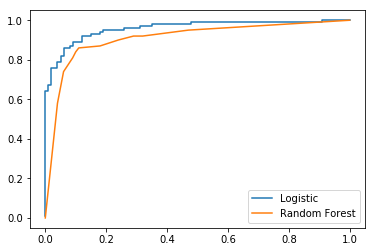

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
train_cv_proba_forest = cross_val_predict(forest_clf, train_x, train_y, method="predict_proba")
y_score_forest = train_cv_proba_forest[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(train_y, y_score_forest)

plt.plot(fpr, tpr, label="Logistic")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend()
plt.show()

In [62]:
# ROC integral for random forests
roc_auc_score(train_y, train_cv_proba_forest[:,1])

0.90854999999999997

In [63]:
# ROC integral for logistic regression
roc_auc_score(train_y, train_y_scores[:,1])

0.95829999999999993

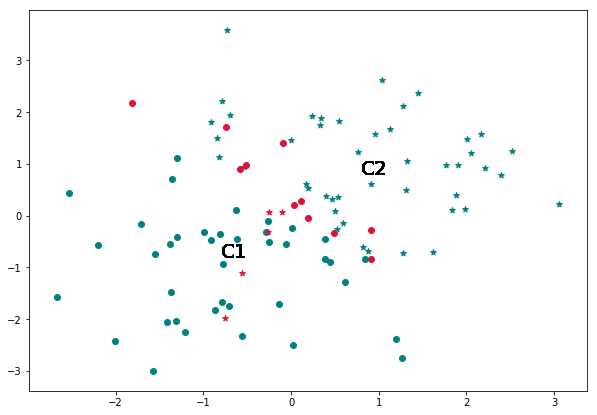

In [184]:
plt.figure(figsize=(10,7))
for row in np.c_[test_x, test_y, test_predict]:
    x1, x2, trueval, predval = row
    
    marker = "*" if trueval == 1 else "o"
    color = "teal" if trueval == predval else "crimson"
    
    plt.scatter(x1, x2, marker=marker, color=color)
    plt.text(-0.8, -0.8, "C1", fontsize=20)
    plt.text(0.8, 0.8, "C2", fontsize=20)

plt.show()